## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [1]:
import pandas as pd

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

data_hw = pd.read_csv(dataset_url)

print(data_hw.head())



    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [2]:
print("Chýbajúce hodnoty v datasete:")
print(data_hw.isna().sum())

Chýbajúce hodnoty v datasete:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [4]:
selected_columns = ['age', 'anaemia', 'high_blood_pressure', 'serum_sodium', 'DEATH_EVENT']
print("\nTypy vybraných premenných:")
print(data_hw[selected_columns].dtypes)


Typy vybraných premenných:
age                    float64
anaemia                  int64
high_blood_pressure      int64
serum_sodium             int64
DEATH_EVENT              int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [3]:
duplicates = data_hw.duplicated().sum()
print(f"\nPočet duplicitných záznamov: {duplicates}")


Počet duplicitných záznamov: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [4]:
print("\nRozdelenie hodnôt pre premennú 'sex':")
print(data_hw['sex'].value_counts())


Rozdelenie hodnôt pre premennú 'sex':
sex
1    194
0    105
Name: count, dtype: int64


**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [5]:
print("\nRozdelenie hodnôt pre premennú 'smoking':")
print(data_hw['smoking'].value_counts())


Rozdelenie hodnôt pre premennú 'smoking':
smoking
0    203
1     96
Name: count, dtype: int64


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [7]:
print(data_hw['age'].describe())
most_common_age = data_hw['age'].mode()[0]
print(f"\nNajčastejšie sa vyskytujúci vek: {most_common_age}")

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Najčastejšie sa vyskytujúci vek: 60.0


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

**Z akého veku je v datasete najviac záznamov?**

### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

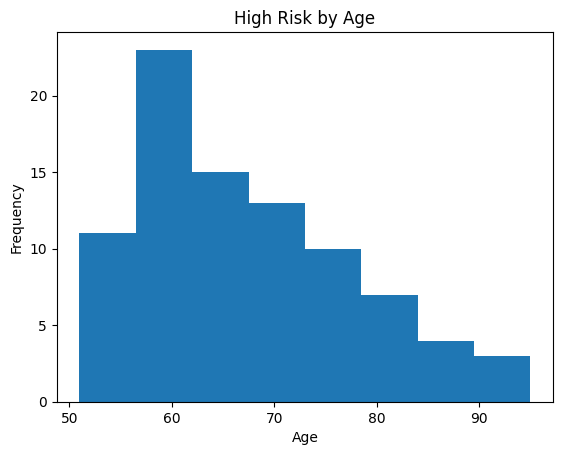

In [8]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hw['risk'] = data_hw.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hw[data_hw['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

In [ ]:
# TODO

**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


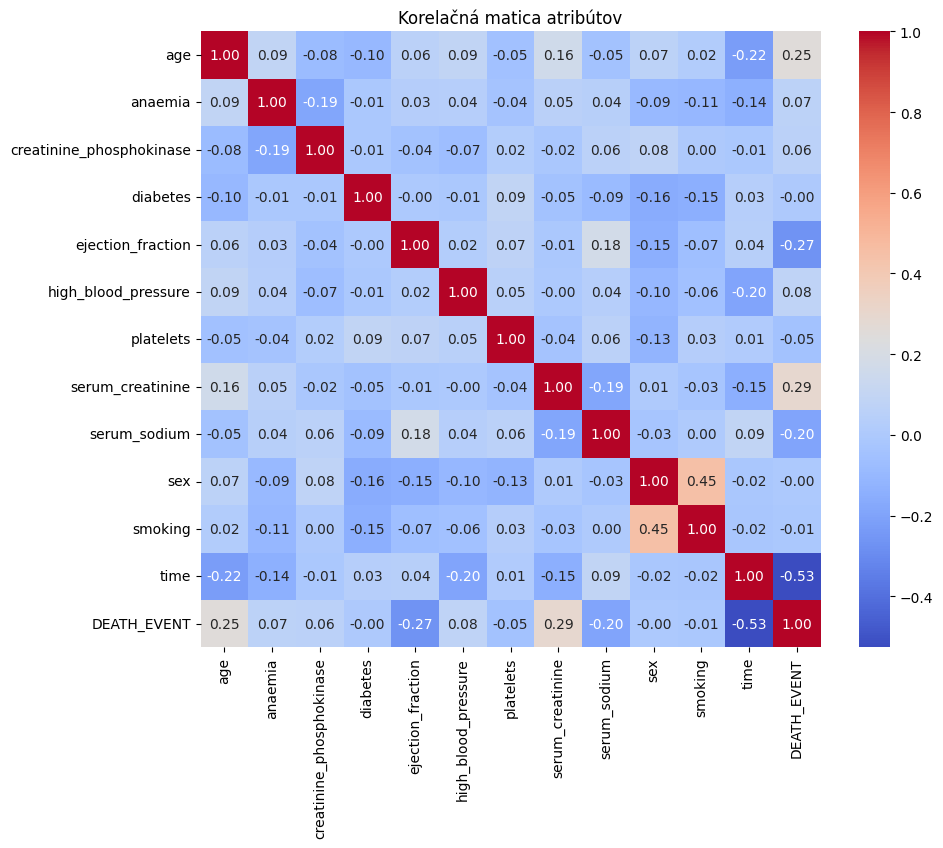

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = data_hw.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelačná matica atribútov")
plt.show()


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure